In [1]:
#1. Data Exploration
#a. Load the Dataset and Perform Exploratory Data Analysis (EDA)
#Load the Data:
import pandas as pd

# Load the datasets
train_path = "C:/Users/user/AppData/Local/Temp/1ac69fec-2479-4566-b302-0d7fa3d97012_Logistic Regression.zip.012/Logistic Regression/Titanic_train.csv"
test_path = "C:/Users/user/AppData/Local/Temp/a50c3b4e-26af-483d-b6cf-763e1e7fabe8_Logistic Regression.zip.be8/Logistic Regression/Titanic_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [2]:
#Examine Features, Types, and Summary Statistics:
# Display the first few rows of the dataset
print(train_df.head())

# Get summary statistics
print(train_df.describe(include='all'))

# Check for missing values
print(train_df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

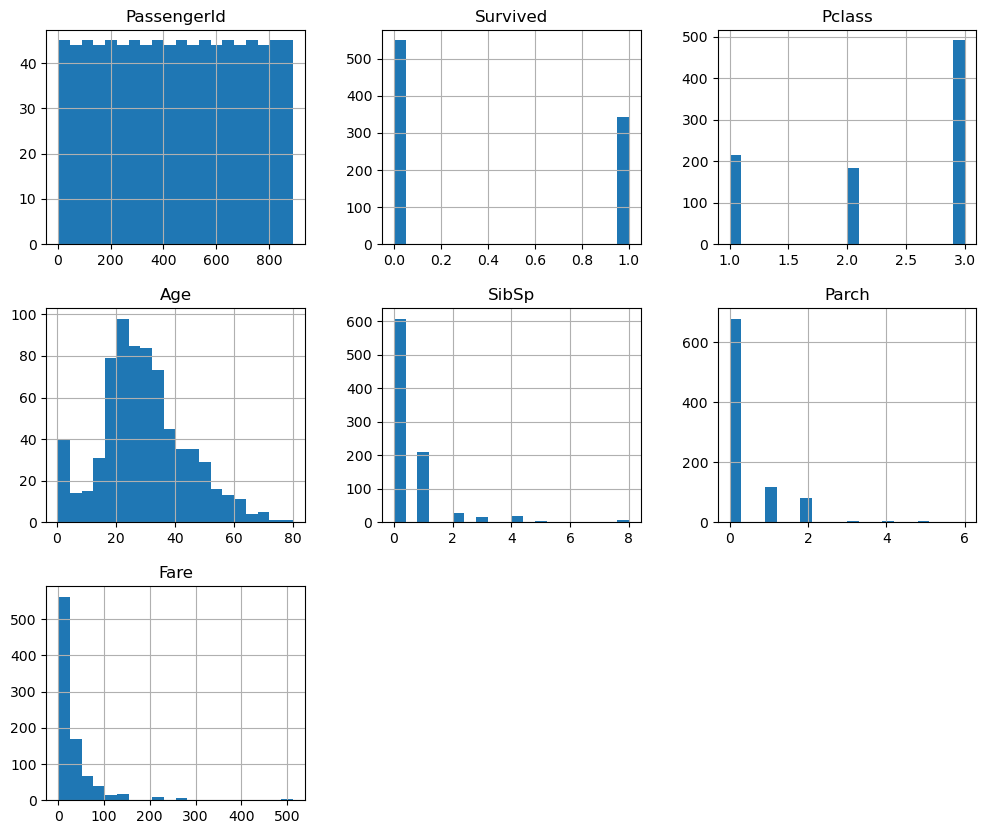

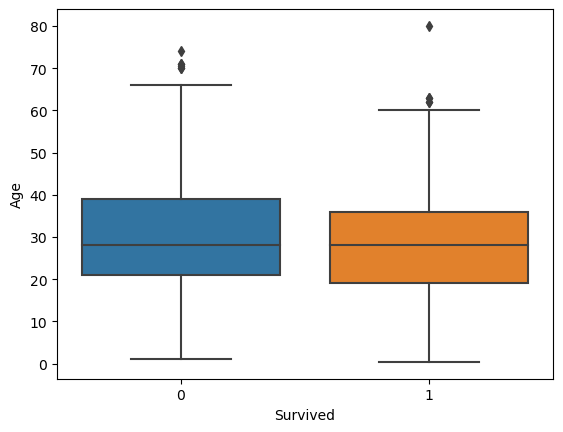

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


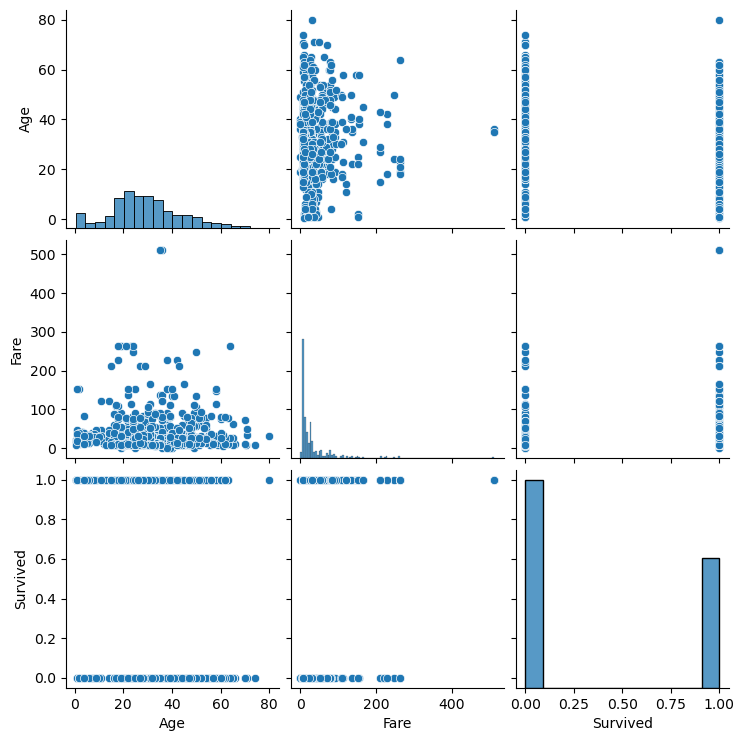

C:\Users\user\AppData\Local\Temp\ipykernel_10592\1290337906.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')


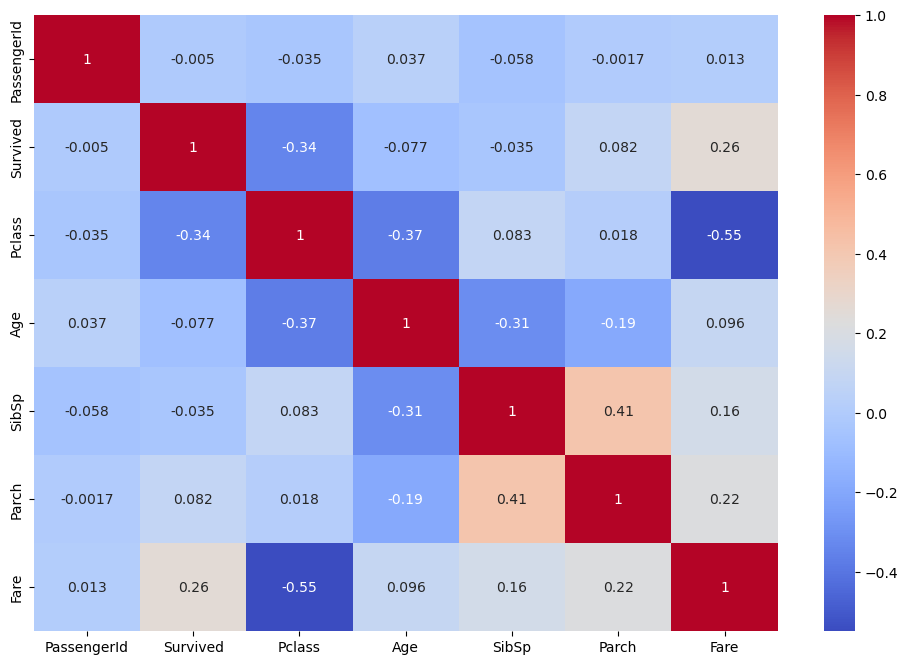

In [3]:
#Create Visualizations:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
train_df.hist(figsize=(12, 10), bins=20)
plt.show()

# Box plots for numerical features by class
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.show()

# Pair plot for selected features
sns.pairplot(train_df[['Age', 'Fare', 'Survived']])
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [4]:
#2. Data Preprocessing
#a. Handle Missing Values
#Impute Missing Values
from sklearn.impute import SimpleImputer

# Impute Age missing values with median
imputer_age = SimpleImputer(strategy='median')
train_df['Age'] = imputer_age.fit_transform(train_df[['Age']])

# Impute Embarked missing values with most frequent value
imputer_embarked = SimpleImputer(strategy='most_frequent')
train_df['Embarked'] = imputer_embarked.fit_transform(train_df[['Embarked']])

# Check again for missing values
print(train_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [5]:
#b. Encode Categorical Variables
#One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Encode categorical features
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# Align train and test data columns
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)


In [6]:
#3. Model Building
#a. Build and Train the Logistic Regression Model
#Prepare Features and Target:
from sklearn.model_selection import train_test_split

X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Train the Model:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC Score: 0.8824967824967825


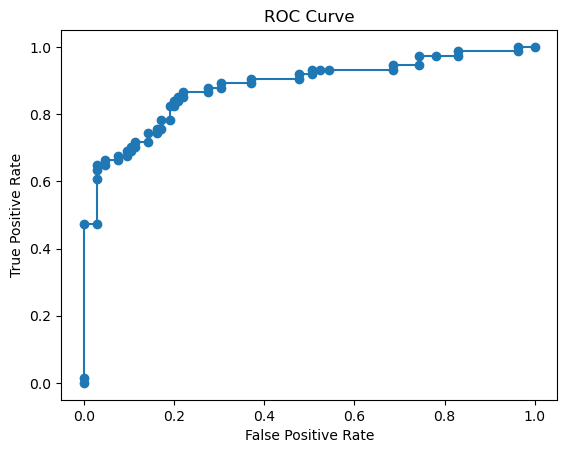

In [8]:
#4. Model Evaluation
#a. Evaluate Performance
#Make Predictions and Evaluate:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predict on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, marker='o', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [9]:
#5. Interpretation
#a. Interpret Coefficients
#View Coefficients:
coef = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coef)


            Coefficient
Pclass        -0.937033
Age           -0.030494
SibSp         -0.294911
Parch         -0.108488
Fare           0.002592
Sex_male      -2.593063
Embarked_Q    -0.111237
Embarked_S    -0.398404


In [14]:
import streamlit as st
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the trained model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)  # Ensure model is trained with the same data

st.title('Titanic Survival Prediction')

# User input
age = st.slider('Age', 0, 100, 30)
fare = st.number_input('Fare', 0.0, 500.0, 10.0)
sex = st.selectbox('Sex', ['male', 'female'])
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])
pclass = st.selectbox('Pclass', [1, 2, 3])

# DataFrame for prediction
user_data = pd.DataFrame([[age, fare, sex, embarked, pclass]],
                         columns=['Age', 'Fare', 'Sex', 'Embarked', 'Pclass'])

# Encode the input
user_data_encoded = pd.get_dummies(user_data, columns=['Sex', 'Embarked'], drop_first=True)
user_data_encoded = user_data_encoded.reindex(columns=X.columns, fill_value=0)

# Predict
prediction = model.predict(user_data_encoded)
st.write('Survival Prediction:', 'Survived' if prediction[0] == 1 else 'Did not survive')


In [ ]:
step-6 i have installed streamlit in anaconda navigator everything done but only deployment is not done.

In [ ]:
Interview questions:
===================    
1. What is the difference between precision and recall?
Precision and Recall are metrics used to evaluate the performance of classification models, particularly when dealing with imbalanced datasets.

Precision:

Concept: Precision measures how many of the items the model classified as positive are actually positive. In other words, it’s about the accuracy of the positive predictions.
Use Case: Precision is crucial when the cost of false positives is high. For example, in email spam detection, a high precision means that most of the emails flagged as spam are genuinely spam, reducing the risk of mistakenly classifying important emails as spam.
Recall:

Concept: Recall measures how many of the actual positive items were correctly identified by the model. It’s about the ability of the model to capture all possible positives.
Use Case: Recall is important when the cost of missing a positive case is high. For instance, in medical diagnoses, a high recall ensures that most of the patients who have a disease are identified, which is crucial for early treatment and prevention.
    
2. What is cross-validation, and why is it important in binary classification?
Cross-validation is a technique used to assess how well a machine learning model generalizes to an independent dataset. It helps in evaluating the model’s performance and avoiding overfitting.

Concept: Cross-validation involves splitting the dataset into multiple subsets or folds. The model is trained on some of these folds and tested on the remaining ones. This process is repeated multiple times, with different folds used for training and testing each time. The results are then averaged to give a more reliable estimate of the model’s performance.

Common Method:

k-Fold Cross-Validation: The dataset is divided into k subsets. The model is trained 𝑘 times, each time using 𝑘-1

k−1 folds for training and the remaining one for testing. The performance metrics are averaged across all 

k runs.
Importance in Binary Classification:

Reliable Performance Estimate: It provides a more accurate assessment of how the model will perform on unseen data compared to a single train-test split.
Mitigates Overfitting: By evaluating the model on multiple subsets, cross-validation helps ensure that the model’s performance is not overly optimistic due to overfitting to a specific training set.
Model Selection: It helps in comparing different models or hyperparameters by providing a more robust measure of their performance across different subsets of the data.   